In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
plt.rcParams.update({'font.size': 20})    

def A(n): # assemblage de la matrice de discrétisation A
    diags = np.array([0,-1,1])
    data = np.array([[-2 for i in range(n)], [1 for i in range(n)], [1 for i in range(n)]])
    A = spdiags(data, diags, n, n).toarray()
    return A

def B(n): # assemblage de B
    diags = np.array([0,-1])
    data = np.array([[-1 for i in range(n)], [1 for i in range(n)]])
    B = spdiags(data, diags, n, n).toarray()
    return B

def Jh(x,f):
    n = np.size(x)
    h=1/n
    P = np.dot(B(n),x)
    return (h*np.sum(np.abs(x)) + 1/2*1/h*np.dot(P,P) + np.dot(P,f))


def nablaJh(x,f): # expression du gradient de J
    n = np.size(x)
    h=1/n
    P = np.dot(A(n),x)
    Q = np.dot(B(n),f)
    return (np.sign(x) - 1/(h**2)*P - 1/h*Q)


In [4]:
# discrétisation
N = 10
h = 1/(N)
tt = np.linspace(0,1,N)


# paramètres
nitermax=4000
imax=10
c1, beta, epsilon = 0.5, 0.75, 1e-5
niter=0

x = np.zeros((N,))
f0 = lambda y : y*(y>=0)*(y<=1/2) + (1-y)*(y>1/2)*(y<=1)
f = np.array([f0(j*h) for j in range(N)])
#f = np.ones((N,))
J = Jh(x,f)
g = nablaJh(x,f)
K = np.dot(g,g)
norm_g = np.sqrt(K)
norm_g0=norm_g
t = h

F, I, G =[J],[], [norm_g]

# boucle d'optimisation
while norm_g>epsilon*norm_g0 and niter<nitermax:   
    # line search 
    i, t = 0, 1.2*t 
    xt = x - t*g
    Jt= Jh(xt,f)
    while Jt>=J - c1*t*K and i<imax:  
        t = beta*t
        xt = x - t*g
        Jt= Jh(xt,f)
        i+=1
    
    # updates
    x, J =xt, Jt
    g = nablaJh(x,f)
    K=np.dot(g,g)
    norm_g=np.sqrt(K)
    niter+=1   
    
    # stockages
    I.append(i)
    G.append(norm_g/norm_g0)
    F.append(J)

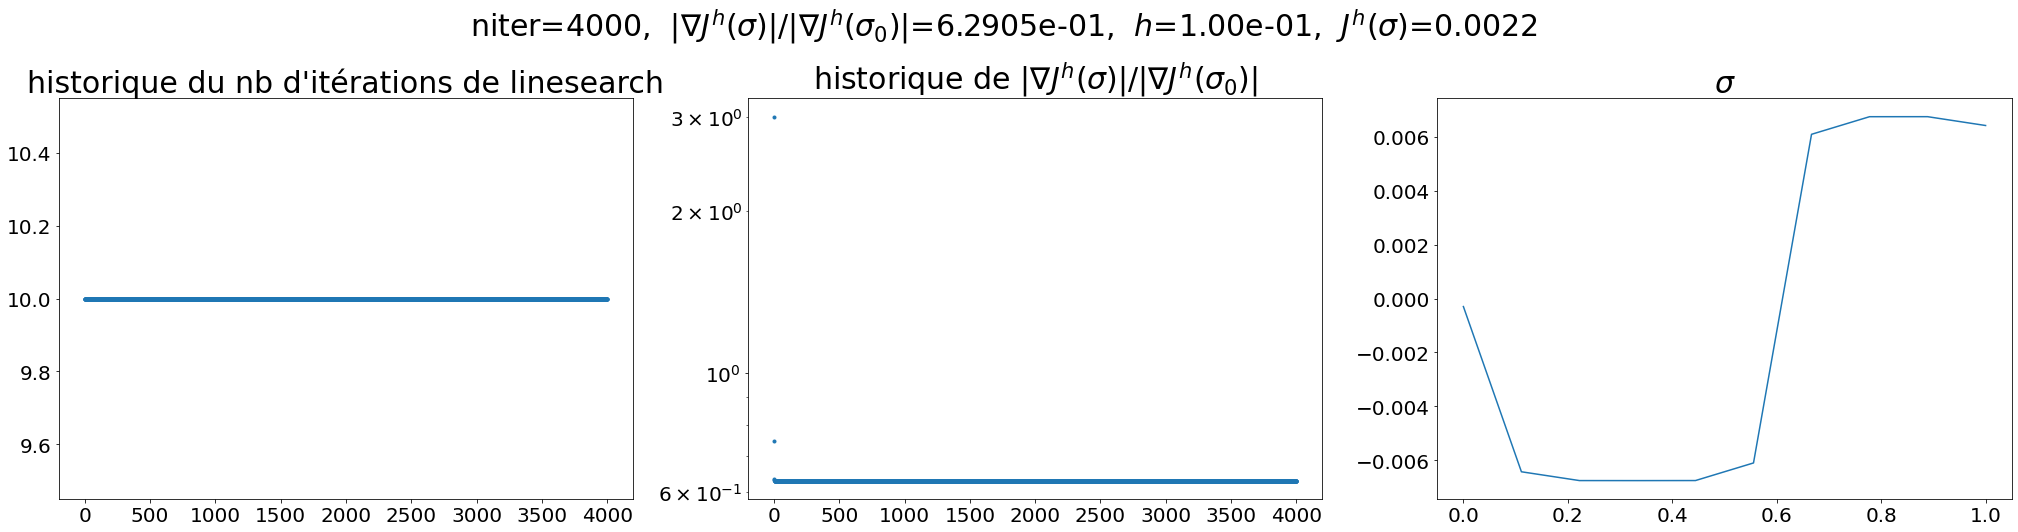

In [11]:
### Solution 9. b    # Figures    
fig, axs = plt.subplots(1,3, figsize=(35,8))
fig.subplots_adjust(top=0.82)   
titre=r"niter={},  $|\nabla J^h(\sigma)|/|\nabla J^h(\sigma_0)|$={:1.4e},  $h$={:1.2e},  $J^h(\sigma)$={:1.4f}".format(
    niter,G[-1],h,J)
fig.suptitle(titre, fontsize = 30.0)
axs[0].plot(I,'.')
axs[0].set_title("historique du nb d'itérations de linesearch",fontsize = 30.0)

axs[1].semilogy(G,'.')
axs[1].set_title(r"historique de $|\nabla J^h(\sigma)|/|\nabla J^h(\sigma_0)|$",fontsize = 30.0)

axs[2].plot(tt,x)
axs[2].set_title("$\sigma$",fontsize = 30.0)

plt.show()